In [1]:
from datetime import timedelta
import datetime
import time

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
# %matplotlib qt

import seaborn as sns

import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Import dataset

In [2]:
turbine = 'T01'
path_dataset = f'../dataset/df_turbine_{turbine}.json'

## dataset

In [3]:
df = pd.read_json(path_dataset)
df.set_index('timestamp', inplace=True)
df.sort_index(ascending=True,inplace=True)
df.head()

turbine_id  grd_prod_pwr_min  gen_rpm_avg  \
timestamp                                                       
2016-01-01 00:00:00        T01             -33.5       1249.0   
2016-01-01 00:10:00        T01             -38.2        999.7   
2016-01-01 00:20:00        T01             -34.1        774.0   
2016-01-01 00:30:00        T01             -27.7       1257.1   
2016-01-01 00:40:00        T01             -50.2       1257.7   

                     blds_pitchangle_max  grd_prod_pwr_avg  \
timestamp                                                    
2016-01-01 00:00:00                  4.5              26.2   
2016-01-01 00:10:00                 59.6              10.1   
2016-01-01 00:20:00                 24.0              59.0   
2016-01-01 00:30:00                  0.9             135.7   
2016-01-01 00:40:00                  4.4              98.9   

                     amb_winddir_abs_avg  gen_bear_temp_avg  \
timestamp                                                     
2016-01-01 00:00:00                206.1               41.0   
2016-01-01 00:10:00                217.4               41.0   
2016-01-01 00:20:00                207.4               41.0   
2016-01-01 00:30:00                232.0               40.0   
2016-01-01 00:40:00                245.6               40.0   

                     amb_windspeed_min  grd_prod_reactpwr_max  \
timestamp                                                       
2016-01-01 00:00:00                0.5                   13.2   
2016-01-01 00:10:00                0.4                    1.8   
2016-01-01 00:20:00                0.7                  999.9   
2016-01-01 00:30:00                0.7                    0.0   
2016-01-01 00:40:00                0.8                   17.8   

                     grd_prod_curphse1_avg  ...  grd_prod_voltphse1_avg  \
timestamp                                   ...                           
2016-01-01 00:00:00                   46.5  ...                   401.6   
2016-01-01 00:10:00                   34.3  ...                   401.9   
2016-01-01 00:20:00                   78.6  ...                   401.4   
2016-01-01 00:30:00                  128.1  ...                   399.7   
2016-01-01 00:40:00                  104.7  ...                   399.5   

                     grd_prod_psblepwr_std  grd_prod_cosphi_avg  \
timestamp                                                         
2016-01-01 00:00:00                   31.9                  0.7   
2016-01-01 00:10:00                   24.7                  0.7   
2016-01-01 00:20:00                   54.3                  0.7   
2016-01-01 00:30:00                   53.1                  0.8   
2016-01-01 00:40:00                   60.2                  0.7   

                     prod_latestavg_actpwrgen0  prod_latestavg_actpwrgen1  \
timestamp                                                                   
2016-01-01 00:00:00                     -107.0                     4420.0   
2016-01-01 00:10:00                     -753.0                     2488.0   
2016-01-01 00:20:00                     -784.0                    10488.0   
2016-01-01 00:30:00                        0.0                    22673.0   
2016-01-01 00:40:00                      -75.0                    16581.0   

                     prod_latestavg_actpwrgen2  rtr_rpm_std  component  \
timestamp                                                                
2016-01-01 00:00:00                        0.0          0.1       None   
2016-01-01 00:10:00                        0.0          4.0       None   
2016-01-01 00:20:00                        0.0          4.3       None   
2016-01-01 00:30:00                        0.0          0.1       None   
2016-01-01 00:40:00                        0.0          0.2       None   

                     remarks  failure  
timestamp                              
2016-01-01 00:00:00     None        0  
2016-01-01 00:10:00     None        0  
2016-01-01 00:20

## check number of failures

In [4]:
df.loc[~df['component'].isnull(),['turbine_id','component', 'remarks','failure']]


turbine_id    component                  remarks  failure
timestamp                                                                    
2016-07-18 02:10:00        T01      GEARBOX     Gearbox pump damaged        1
2017-08-11 13:14:00        T01  TRANSFORMER  Transformer fan damaged        1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87147 entries, 2016-01-01 00:00:00 to 2017-09-01 00:00:00
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   turbine_id                   87147 non-null  object 
 1   grd_prod_pwr_min             87146 non-null  float64
 2   gen_rpm_avg                  87146 non-null  float64
 3   blds_pitchangle_max          87146 non-null  float64
 4   grd_prod_pwr_avg             87146 non-null  float64
 5   amb_winddir_abs_avg          87146 non-null  float64
 6   gen_bear_temp_avg            87145 non-null  float64
 7   amb_windspeed_min            87146 non-null  float64
 8   grd_prod_reactpwr_max        87146 non-null  float64
 9   grd_prod_curphse1_avg        87146 non-null  float64
 10  grd_prod_pwr_max             87146 non-null  float64
 11  grd_prod_pwr_std             87146 non-null  float64
 12  blds_pitchangle_min          87146 non-

In [6]:
datatypes = pd.DataFrame(df.dtypes, columns=['dtypes'])
datatypes['dtypes'].value_counts()

float64    81
object      3
int64       1
Name: dtypes, dtype: int64

In [7]:
datatypes[datatypes['dtypes'] == 'int64']

dtypes
failure  int64

There is only 3 columns as string

In [8]:
tags_float = datatypes[datatypes['dtypes'] == 'float'].index.tolist()
tags_str = datatypes[datatypes['dtypes'] == 'object'].index.tolist()
tags_int = datatypes[datatypes['dtypes'] == 'int64'].index.tolist()


## Check Duplicates

In [9]:
df[df.index.duplicated(keep=False)]

turbine_id  grd_prod_pwr_min  gen_rpm_avg  \
timestamp                                                       
2016-10-30 02:00:00        T01             612.8       1648.7   
2016-10-30 02:00:00        T01            1855.1       1680.8   
2016-10-30 02:10:00        T01             598.5       1618.6   
2016-10-30 02:10:00        T01            1856.9       1681.5   
2016-10-30 02:20:00        T01             753.5       1633.0   
2016-10-30 02:20:00        T01            1743.8       1681.4   
2016-10-30 02:30:00        T01            1297.8       1676.9   
2016-10-30 02:30:00        T01             978.9       1663.0   
2016-10-30 02:40:00        T01            1084.7       1662.0   
2016-10-30 02:40:00        T01             859.0       1652.7   
2016-10-30 02:50:00        T01             682.9       1631.8   
2016-10-30 02:50:00        T01             724.8       1635.1   

                     blds_pitchangle_max  grd_prod_pwr_avg  \
timestamp                                                    
2016-10-30 02:00:00                  4.6            1527.8   
2016-10-30 02:00:00                 11.0            1999.2   
2016-10-30 02:10:00                  1.6            1178.6   
2016-10-30 02:10:00                  8.9            1999.4   
2016-10-30 02:20:00                  2.9            1280.8   
2016-10-30 02:20:00                  9.6            1997.4   
2016-10-30 02:30:00                  8.5            1845.2   
2016-10-30 02:30:00                  4.2            1660.4   
2016-10-30 02:40:00                  5.5            1659.9   
2016-10-30 02:40:00                  1.9            1501.1   
2016-10-30 02:50:00                  0.3            1217.3   
2016-10-30 02:50:00                  1.5            1246.4   

                     amb_winddir_abs_avg  gen_bear_temp_avg  \
timestamp                                                     
2016-10-30 02:00:00                127.3               69.0   
2016-10-30 02:00:00                103.3               70.0   
2016-10-30 02:10:00                129.0               67.0   
2016-10-30 02:10:00                101.3               70.0   
2016-10-30 02:20:00                133.5               66.0   
2016-10-30 02:20:00                112.7               70.0   
2016-10-30 02:30:00                101.3               71.0   
2016-10-30 02:30:00                116.4               65.0   
2016-10-30 02:40:00                111.4               64.0   
2016-10-30 02:40:00                111.7               70.0   
2016-10-30 02:50:00                100.7               70.0   
2016-10-30 02:50:00                105.4               64.0   

                     amb_windspeed_min  grd_prod_reactpwr_max  \
timestamp                                                       
2016-10-30 02:00:00                1.6                 -197.8   
2016-10-30 02:00:00                4.0                 -211.7   
2016-10-30 02:10:00                1.7                 -201.6   
2016-10-30 02:10:00                4.1                 -217.4   
2016-10-30 02:20:00                3.3                 -204.1   
2016-10-30 02:20:00                4.6                 -217.2   
2016-10-30 02:30:00                3.3                 -217.4   
2016-10-30 02:30:00                3.8                 -201.8   
2016-10-30 02:40:00                2.6                 -204.1   
2016-10-30 02:40:00                2.5                 -207.1   
2016-10-30 02:50:00                3.1                 -201.8   
2016-10-30 02:50:00                1.7                 -201.9   

                     grd_prod_curphse1_avg  ...  grd_prod_voltphse1_avg  \
timestamp                                   ...                           
2016-10-30 02:00:00                 1282.0  ...                   397.6   
2016-10-30 02:00:00                 1666.5  ...                   399.7   
2016-10-30 02:10:00                  996.1  ...                   398.0   
2016-10-30 02:10:00                 1674.0  ...                   397.6

In [10]:
print(f'before {df.shape}')
df = df[~df.index.duplicated(keep='first')]
print(f'after {df.shape}')


before (87147, 85)
after (87141, 85)


## Splitting Training and Test Set

In [11]:
training_set = df.loc['2016-01-01':'2016-12-31'].copy()
test_set =  df.loc['2017-01-01':'2017-12-31'].copy()

# Analyse Training Set

There is many many columns to analyse, so in order to make it simple and reduce the dataset 

# Numerical Variables

## Check for Missing Data

In [12]:
pct_null = df.isnull().sum() /df.shape[0]
pct_null.sort_values(ascending=False)


component                  0.999977
remarks                    0.999977
gen_bear_temp_avg          0.000023
grd_prod_cosphi_avg        0.000023
rtr_rpm_std                0.000011
                             ...   
grd_busbar_temp_avg        0.000011
grd_prod_psblepwr_min      0.000011
hvtrafo_phase2_temp_avg    0.000011
turbine_id                 0.000000
failure                    0.000000
Length: 85, dtype: float64

The columns don't have high percentage of null data

## Check for Inf values

In [13]:
# check for infinite values
d = ~np.isfinite(training_set[tags_float])
d.sum()

grd_prod_pwr_min             0
gen_rpm_avg                  0
blds_pitchangle_max          0
grd_prod_pwr_avg             0
amb_winddir_abs_avg          0
                            ..
grd_prod_cosphi_avg          0
prod_latestavg_actpwrgen0    0
prod_latestavg_actpwrgen1    0
prod_latestavg_actpwrgen2    0
rtr_rpm_std                  0
Length: 81, dtype: int64

In [14]:
# replace inf values
training_set[tags_float] = training_set[tags_float].replace([np.inf, -np.inf], np.nan)

## Fillna

In [15]:
# fillna
training_set[tags_float] = training_set[tags_float].fillna(method='backfill')

In [16]:
pct_null = training_set[tags_float].isnull().sum() /training_set[tags_float].shape[0]
pct_null.sort_values(ascending=False)


grd_prod_pwr_min          0.0
nac_temp_avg              0.0
gen_bear2_temp_avg        0.0
gen_rpm_max               0.0
amb_windspeed_est_avg     0.0
                         ... 
amb_windspeed_avg         0.0
grd_prod_voltphse3_avg    0.0
grd_busbar_temp_avg       0.0
grd_prod_psblepwr_min     0.0
rtr_rpm_std               0.0
Length: 81, dtype: float64

In [17]:
training_set_float = training_set[tags_float].copy()

## Check for tags with high correlation and drop one of them - VIF

In [18]:
vif_saved = False

if vif_saved == True:
    pass
else:
    print(f'Started at --- {str(datetime.datetime.now() - timedelta(hours=3))}')
    start_time = time.time()

    # Scaling first to ease the calculations
    scaler = StandardScaler()

    X = training_set_float.copy()
    X_scaled = scaler.fit_transform(X)

    # Keep DataFrame indexes ---------------------------------------------------------
    X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns, index=X.index)

    vif_factor_threshold = 5
    iter = 1
    span_tags_to_remove = 1

    while iter > 0:
        print(f'\r{len(X_scaled.columns)}', end="")

        vif = pd.DataFrame()
        vif["features"] = X_scaled.columns
        vif["VIF Factor"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
        vif_high = vif.sort_values(by=['VIF Factor'], ascending=False)

        if vif_high[vif_high['VIF Factor'] > vif_factor_threshold].shape[0] == 0:
            iter = 0
        else:
            tag_name = vif_high[vif_high['VIF Factor'] > vif_factor_threshold].iloc[:span_tags_to_remove]['features']
            cols = X_scaled.columns.tolist()
            for t in tag_name:
                cols.remove(t)
            X_scaled = X_scaled[cols].copy()

    execution = "--- %s minutes ---" + str(round((time.time() - start_time)/60,2))
    print(f'Ended at --- {str(datetime.datetime.now() - timedelta(hours=3))}')
    print(f'duration: {execution}')

    display(vif_high)

Started at --- 2021-11-10 05:57:55.888475
81

C:\Users\rhamacherhay\Anaconda3\envs\hamacher_env\lib\site-packages\statsmodels\regression\linear_model.py:1740: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


22Ended at --- 2021-11-10 06:45:04.356752
duration: --- %s minutes ---47.14


features  VIF Factor
15            amb_windspeed_max    4.625094
5         grd_prod_psblecap_min    4.254049
6             amb_windspeed_std    3.743055
12          blds_pitchangle_avg    3.640069
13             hyd_oil_temp_avg    3.381509
2         grd_prod_reactpwr_max    2.833434
20          grd_prod_cosphi_avg    2.742187
9         grd_prod_psbleind_std    2.588305
7         grd_prod_reactpwr_min    2.479684
14  prod_latestavg_reactpwrgen0    2.467939
1             amb_windspeed_min    2.337558
19        grd_prod_psblepwr_std    2.151706
11            nac_direction_avg    2.150612
0           amb_winddir_abs_avg    2.135816
8             cont_hub_temp_avg    2.056340
3       hvtrafo_phase1_temp_avg    2.044952
17          blds_pitchangle_std    1.534434
18       grd_prod_voltphse1_avg    1.316294
4      amb_winddir_relative_avg    1.007832
16            grd_prod_freq_avg    1.000665
10  prod_latestavg_reactpwrgen2         NaN
21    prod_latestavg_actpwrgen2         NaN

In [19]:
vif_file_saved = False

if vif_file_saved == False:
    vif_filename = f'../output_EDA/{turbine}/vif_high_{turbine}.json'
    vif_high.to_json(vif_filename)

In [20]:
vif_filename = f'../output_EDA/{turbine}/vif_high_{turbine}.json'
vif_high = pd.read_json(vif_filename)
vif_high

features  VIF Factor
15            amb_windspeed_max    4.625094
5         grd_prod_psblecap_min    4.254049
6             amb_windspeed_std    3.743055
12          blds_pitchangle_avg    3.640069
13             hyd_oil_temp_avg    3.381509
2         grd_prod_reactpwr_max    2.833434
20          grd_prod_cosphi_avg    2.742187
9         grd_prod_psbleind_std    2.588305
7         grd_prod_reactpwr_min    2.479684
14  prod_latestavg_reactpwrgen0    2.467939
1             amb_windspeed_min    2.337558
19        grd_prod_psblepwr_std    2.151706
11            nac_direction_avg    2.150612
0           amb_winddir_abs_avg    2.135816
8             cont_hub_temp_avg    2.056340
3       hvtrafo_phase1_temp_avg    2.044952
17          blds_pitchangle_std    1.534434
18       grd_prod_voltphse1_avg    1.316294
4      amb_winddir_relative_avg    1.007832
16            grd_prod_freq_avg    1.000665
10  prod_latestavg_reactpwrgen2         NaN
21    prod_latestavg_actpwrgen2         NaN

In [21]:
print(f'Frmo 80 columns noe we have {vif_high.shape[0]}')

tags_float_red = vif_high['features'].values
training_set_float_red = training_set_float[tags_float_red]
training_set_float_red

Frmo 80 columns noe we have 22


amb_windspeed_max  grd_prod_psblecap_min  \
timestamp                                                       
2016-01-01 00:00:00               11.6                    0.0   
2016-01-01 00:10:00               12.5                    0.0   
2016-01-01 00:20:00                8.8                    0.0   
2016-01-01 00:30:00                9.9                    0.0   
2016-01-01 00:40:00                9.9                    0.0   
...                                ...                    ...   
2016-12-31 23:10:00                9.3                  569.4   
2016-12-31 23:20:00               12.6                  553.6   
2016-12-31 23:30:00                9.7                  530.0   
2016-12-31 23:40:00                8.7                  890.4   
2016-12-31 23:50:00               13.4                  406.2   

                     amb_windspeed_std  blds_pitchangle_avg  hyd_oil_temp_avg  \
timestamp                                                                       
2016-01-01 00:00:00                0.9                  0.6              30.0   
2016-01-01 00:10:00                0.9                  8.1              30.0   
2016-01-01 00:20:00                1.0                 10.4              30.0   
2016-01-01 00:30:00                1.1                 -0.5              30.0   
2016-01-01 00:40:00                1.2                 -0.1              30.0   
...                                ...                  ...               ...   
2016-12-31 23:10:00                0.9                 -1.5              26.0   
2016-12-31 23:20:00                0.9                 -1.3              26.0   
2016-12-31 23:30:00                0.9                 -1.3              26.0   
2016-12-31 23:40:00                0.9                 -1.7              26.0   
2016-12-31 23:50:00                1.0                 -1.5              26.0   

                     grd_prod_reactpwr_max  grd_prod_cosphi_avg  \
timestamp                                                         
2016-01-01 00:00:00                   13.2                  0.7   
2016-01-01 00:10:00                    1.8                  0.7   
2016-01-01 00:20:00                  999.9                  0.7   
2016-01-01 00:30:00                    0.0                  0.8   
2016-01-01 00:40:00                   17.8                  0.7   
...                                    ...                  ...   
2016-12-31 23:10:00                 -109.1                  0.9   
2016-12-31 23:20:00                 -115.8                  0.9   
2016-12-31 23:30:00                 -105.7                  0.9   
2016-12-31 23:40:00                 -102.6                  0.9   
2016-12-31 23:50:00                 -112.9                  0.9   

                     grd_prod_psbleind_std  grd_prod_reactpwr_min  \
timestamp                                                           
2016-01-01 00:00:00                  157.1                 -100.0   
2016-01-01 00:10:00                  123.7                 -100.1   
2016-01-01 00:20:00                  357.4                 -108.1   
2016-01-01 00:30:00                  245.8                 -105.1   
2016-01-01 00:40:00                  302.7                 -107.1   
...                                    ...                    ...   
2016-12-31 23:10:00                   75.4                 -125.0   
2016-12-31 23:20:00                  102.2                 -131.0   
2016-12-31 23:30:00                   94.3                 -125.0   
2016-12-31 23:40:00                    7.2                 -125.1   
2016-12-31 23:50:00                   90.6                 -128.0   

                     prod_latestavg_reactpwrgen0  ...  nac_direction_avg  \
timestamp                                         ...                      
2016-01-01 00:00:00                        -99.0  ...              218.5   
2016-01-01 00:10:00                       -867.0  ...              218.5   
2016-01-01 00:20:00                       -410.

### Check for low variance 

In [22]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
x = training_set_float_red.std(numeric_only=True).sort_values(ascending=True)
display(x)

tags_float_drop = x[x<=1].index
print('************* DROPPED TAGS *************')
display(tags_float_drop)

tags_float_red = x[x>1].index
training_set_float_red = training_set_float_red[tags_float_red]
print(training_set_float_red.shape)
training_set_float_red


prod_latestavg_actpwrgen2       0.000
prod_latestavg_reactpwrgen2     0.000
grd_prod_freq_avg               0.012
grd_prod_cosphi_avg             0.151
amb_windspeed_std               0.809
amb_windspeed_min               1.137
grd_prod_voltphse1_avg          1.628
blds_pitchangle_std             4.061
cont_hub_temp_avg               5.499
amb_windspeed_max               7.282
hyd_oil_temp_avg                7.630
hvtrafo_phase1_temp_avg         9.148
blds_pitchangle_avg            16.721
amb_winddir_relative_avg       36.631
amb_winddir_abs_avg            94.150
nac_direction_avg              94.904
grd_prod_psbleind_std          97.136
grd_prod_psblepwr_std         103.888
grd_prod_reactpwr_min         131.475
grd_prod_reactpwr_max         211.335
grd_prod_psblecap_min         354.393
prod_latestavg_reactpwrgen0   511.082
dtype: float64

************* DROPPED TAGS *************


Index(['prod_latestavg_actpwrgen2', 'prod_latestavg_reactpwrgen2',
       'grd_prod_freq_avg', 'grd_prod_cosphi_avg', 'amb_windspeed_std'],
      dtype='object')

(52433, 17)


amb_windspeed_min  grd_prod_voltphse1_avg  \
timestamp                                                        
2016-01-01 00:00:00              0.500                 401.600   
2016-01-01 00:10:00              0.400                 401.900   
2016-01-01 00:20:00              0.700                 401.400   
2016-01-01 00:30:00              0.700                 399.700   
2016-01-01 00:40:00              0.800                 399.500   
...                                ...                     ...   
2016-12-31 23:10:00              2.200                 398.500   
2016-12-31 23:20:00              1.400                 398.000   
2016-12-31 23:30:00              1.600                 398.700   
2016-12-31 23:40:00              1.200                 399.200   
2016-12-31 23:50:00              0.800                 399.600   

                     blds_pitchangle_std  cont_hub_temp_avg  \
timestamp                                                     
2016-01-01 00:00:00                0.900             28.000   
2016-01-01 00:10:00               14.700             28.000   
2016-01-01 00:20:00               12.400             28.000   
2016-01-01 00:30:00                0.800             28.000   
2016-01-01 00:40:00                1.200             28.000   
...                                  ...                ...   
2016-12-31 23:10:00                0.400             23.000   
2016-12-31 23:20:00                0.400             23.000   
2016-12-31 23:30:00                0.500             23.000   
2016-12-31 23:40:00                0.300             23.000   
2016-12-31 23:50:00                0.500             23.000   

                     amb_windspeed_max  hyd_oil_temp_avg  \
timestamp                                                  
2016-01-01 00:00:00             11.600            30.000   
2016-01-01 00:10:00             12.500            30.000   
2016-01-01 00:20:00              8.800            30.000   
2016-01-01 00:30:00              9.900            30.000   
2016-01-01 00:40:00              9.900            30.000   
...                                ...               ...   
2016-12-31 23:10:00              9.300            26.000   
2016-12-31 23:20:00             12.600            26.000   
2016-12-31 23:30:00              9.700            26.000   
2016-12-31 23:40:00              8.700            26.000   
2016-12-31 23:50:00             13.400            26.000   

                     hvtrafo_phase1_temp_avg  blds_pitchangle_avg  \
timestamp                                                           
2016-01-01 00:00:00                   68.000                0.600   
2016-01-01 00:10:00                   68.000                8.100   
2016-01-01 00:20:00                   68.000               10.400   
2016-01-01 00:30:00                   68.000               -0.500   
2016-01-01 00:40:00                   68.000               -0.100   
...                                      ...                  ...   
2016-12-31 23:10:00                   51.000               -1.500   
2016-12-31 23:20:00                   51.000               -1.300   
2016-12-31 23:30:00                   51.000               -1.300   
2016-12-31 23:40:00                   51.000               -1.700   
2016-12-31 23:50:00                   50.000               -1.500   

                     amb_winddir_relative_avg  amb_winddir_abs_avg  \
timestamp                                                            
2016-01-01 00:00:00                   -12.400              206.100   
2016-01-01 00:10:00                    -1.100              217.400   
2016-01-01 00:20:00                    -5.800              207.400   
2016-01-01 00:30:00                     9.600              232.000   
2016-01-01 00:40:00                    23.300              245.600   
...                                       ...                  ...   
2016-12-31 23:10:00                    -3.600               98.800   
2016-12-31 23:20:00              

### Check Different Types of Correlations

In [23]:
# Correlation

def plot_corr(df, method='pearson', additional_filename = '' ):
    corr = df.corr(method=method)
    
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)
    ax.set_title(f'{method}')
    filename = f'correlation_heatmap_{method}_{additional_filename}.png'
    plt.savefig(f'../output_EDA/{turbine}/figures/{filename}')
    plt.close(f)
    print(f' ok {filename}')
    
plot_corr(training_set_float_red, 'pearson', '1')
plot_corr(training_set_float_red, 'spearman', '1')


 ok correlation_heatmap_pearson_1.png
 ok correlation_heatmap_spearman_1.png


In [24]:
filename = f'correlation_pairplot.png'
sns.pairplot(training_set_float_red, corner=True)
plt.savefig(f'../output_EDA/{turbine}/figures/{filename}')
plt.close()
print('ok')


ok


In [25]:
profile = ProfileReport(training_set_float_red, title="Pandas Profiling Report", explorative=True)
profile.to_file(f'../output_EDA/{turbine}/{turbine}_pandas_profiling_training.html')
print('ok')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 14.96it/s]

ok


### Drop high correlated variables

In [26]:


df_float_red = training_set_float_red.copy()

print(f'before {df_float_red.shape}')
names = ['not empty']

corr = df_float_red.corr(method='spearman')
names = []
corr
    
loop = corr.iteritems()

for name, values in loop:
    print(name)
    high_corr = values[values.abs() > 0.7]
    cols = high_corr.index.tolist()
    cols.remove(name)
    
    if cols != []:
        print(cols)
        for col in cols:
            if (name in df_float_red.columns.tolist()) & (col in df_float_red.columns.tolist()):
                print(df_float_red.columns.shape) 
                print(f'***** drop {col} *****')
                df_float_red = df_float_red.drop(columns=col)
                print(df_float_red.columns.shape) 
    # if names != []:
    #     corr_sum = corr.abs().sum(axis=0)
    #     high_corr_sum = corr_sum[names]
    #     drop_col = high_corr_sum[high_corr_sum==high_corr_sum.max()].index

    #     df_float_red = df_float_red.drop(columns=drop_col)


print(f'after {df_float_red.shape}')


before (52433, 17)
amb_windspeed_min
grd_prod_voltphse1_avg
blds_pitchangle_std
['grd_prod_psbleind_std']
(17,)
***** drop grd_prod_psbleind_std *****
(16,)
cont_hub_temp_avg
['hyd_oil_temp_avg']
(16,)
***** drop hyd_oil_temp_avg *****
(15,)
amb_windspeed_max
['grd_prod_psblepwr_std', 'grd_prod_reactpwr_min', 'grd_prod_reactpwr_max']
(15,)
***** drop grd_prod_psblepwr_std *****
(14,)
(14,)
***** drop grd_prod_reactpwr_min *****
(13,)
(13,)
***** drop grd_prod_reactpwr_max *****
(12,)
hyd_oil_temp_avg
['cont_hub_temp_avg']
hvtrafo_phase1_temp_avg
blds_pitchangle_avg
['grd_prod_psblepwr_std', 'grd_prod_psblecap_min']
(12,)
***** drop grd_prod_psblecap_min *****
(11,)
amb_winddir_relative_avg
amb_winddir_abs_avg
['nac_direction_avg']
(11,)
***** drop nac_direction_avg *****
(10,)
nac_direction_avg
['amb_winddir_abs_avg']
grd_prod_psbleind_std
['blds_pitchangle_std']
grd_prod_psblepwr_std
['amb_windspeed_max', 'blds_pitchangle_avg']
grd_prod_reactpwr_min
['amb_windspeed_max']
grd_prod_reac

In [27]:
training_set_float_red = df_float_red.copy()
training_set_float_red

amb_windspeed_min  grd_prod_voltphse1_avg  \
timestamp                                                        
2016-01-01 00:00:00              0.500                 401.600   
2016-01-01 00:10:00              0.400                 401.900   
2016-01-01 00:20:00              0.700                 401.400   
2016-01-01 00:30:00              0.700                 399.700   
2016-01-01 00:40:00              0.800                 399.500   
...                                ...                     ...   
2016-12-31 23:10:00              2.200                 398.500   
2016-12-31 23:20:00              1.400                 398.000   
2016-12-31 23:30:00              1.600                 398.700   
2016-12-31 23:40:00              1.200                 399.200   
2016-12-31 23:50:00              0.800                 399.600   

                     blds_pitchangle_std  cont_hub_temp_avg  \
timestamp                                                     
2016-01-01 00:00:00                0.900             28.000   
2016-01-01 00:10:00               14.700             28.000   
2016-01-01 00:20:00               12.400             28.000   
2016-01-01 00:30:00                0.800             28.000   
2016-01-01 00:40:00                1.200             28.000   
...                                  ...                ...   
2016-12-31 23:10:00                0.400             23.000   
2016-12-31 23:20:00                0.400             23.000   
2016-12-31 23:30:00                0.500             23.000   
2016-12-31 23:40:00                0.300             23.000   
2016-12-31 23:50:00                0.500             23.000   

                     amb_windspeed_max  hvtrafo_phase1_temp_avg  \
timestamp                                                         
2016-01-01 00:00:00             11.600                   68.000   
2016-01-01 00:10:00             12.500                   68.000   
2016-01-01 00:20:00              8.800                   68.000   
2016-01-01 00:30:00              9.900                   68.000   
2016-01-01 00:40:00              9.900                   68.000   
...                                ...                      ...   
2016-12-31 23:10:00              9.300                   51.000   
2016-12-31 23:20:00             12.600                   51.000   
2016-12-31 23:30:00              9.700                   51.000   
2016-12-31 23:40:00              8.700                   51.000   
2016-12-31 23:50:00             13.400                   50.000   

                     blds_pitchangle_avg  amb_winddir_relative_avg  \
timestamp                                                            
2016-01-01 00:00:00                0.600                   -12.400   
2016-01-01 00:10:00                8.100                    -1.100   
2016-01-01 00:20:00               10.400                    -5.800   
2016-01-01 00:30:00               -0.500                     9.600   
2016-01-01 00:40:00               -0.100                    23.300   
...                                  ...                       ...   
2016-12-31 23:10:00               -1.500                    -3.600   
2016-12-31 23:20:00               -1.300                    -0.800   
2016-12-31 23:30:00               -1.300                     0.100   
2016-12-31 23:40:00               -1.700                    10.800   
2016-12-31 23:50:00               -1.500                    -2.700   

                     amb_winddir_abs_avg  prod_latestavg_reactpwrgen0  
timestamp                                                              
2016-01-01 00:00:00              206.100                      -99.000  
2016-01-01 00:10:00              217.400                     -867.000  
2016-01-01 00:20:00              207.400                     -410.000  
2016-01-01 00:30:00              232.000                        0.000  
2016-01-01 00:40:00              245.600                      -79.000  
...                                  ...               

In [28]:
# Correlation
    
plot_corr(training_set_float_red, 'pearson', '2')
plot_corr(training_set_float_red, 'spearman', '2')

 ok correlation_heatmap_pearson_2.png
 ok correlation_heatmap_spearman_2.png


## Temporal Analyses

In [29]:
failures_datetime = training_set[training_set['failure'] == 1].index
boundaries_days = 7
filename = f'temporal_analyses.png'

plt.figure(figsize=(30,3*training_set_float_red.shape[1]))
for e,tag in enumerate(training_set_float_red.columns):
    tmp = training_set_float_red[tag].copy()
    
    plt.subplot(training_set_float_red.shape[1],1,e+1)
    plt.title(f'{tag}')
    tmp.plot(zorder=0)
    plt.vlines(failures_datetime, ymin=np.min(tmp), ymax=np.max(tmp), colors='red',linestyles='dashed', zorder=10)
    plt.legend()
    
plt.subplots_adjust(wspace=0.15, hspace=0.3)
plt.tight_layout()
plt.savefig(f'../output_EDA/{turbine}/figures/{filename}')
plt.close()
print(f' ok {filename}')


 ok temporal_analyses.png


In [30]:
failures_datetime = training_set[training_set['failure'] == 1].index
boundaries_days = 7
filename = f'temporal_analyses_alarm'

for failure in failures_datetime:
    failure_datetime_init = failure - timedelta(days=boundaries_days)
    failure_datetime_end = failure + timedelta(days=boundaries_days)
    
    tmp_alarm_period = training_set_float_red[failure_datetime_init:failure_datetime_end].copy()

    plt.figure(figsize=(30,3*training_set_float_red.shape[1]))
    
    for e,tag in enumerate(training_set_float_red.columns):
        tmp = tmp_alarm_period[tag].copy()
        
        plt.subplot(training_set_float_red.shape[1],1,e+1)
        plt.title(f'{tag}')
        tmp.plot(zorder=0)
        plt.vlines(failure, ymin=np.min(tmp), ymax=np.max(tmp), colors='red',linestyles='dashed', zorder=10)
        plt.legend()
        plt.subplots_adjust(wspace=0.15, hspace=0.3)
        plt.tight_layout()

    plt.savefig(f'../output_EDA/{turbine}/figures/{filename}_{str(failure.date())}.png')
    plt.close()
    print(f' ok {filename}')


 ok temporal_analyses_alarm


# Shrink training_set dimension

In [31]:
red_tags_float = training_set_float_red.columns.tolist()
cols = tags_int+ red_tags_float+tags_str
training_set = training_set[cols].copy()
training_set.head()



failure  amb_windspeed_min  grd_prod_voltphse1_avg  \
timestamp                                                                 
2016-01-01 00:00:00        0              0.500                 401.600   
2016-01-01 00:10:00        0              0.400                 401.900   
2016-01-01 00:20:00        0              0.700                 401.400   
2016-01-01 00:30:00        0              0.700                 399.700   
2016-01-01 00:40:00        0              0.800                 399.500   

                     blds_pitchangle_std  cont_hub_temp_avg  \
timestamp                                                     
2016-01-01 00:00:00                0.900             28.000   
2016-01-01 00:10:00               14.700             28.000   
2016-01-01 00:20:00               12.400             28.000   
2016-01-01 00:30:00                0.800             28.000   
2016-01-01 00:40:00                1.200             28.000   

                     amb_windspeed_max  hvtrafo_phase1_temp_avg  \
timestamp                                                         
2016-01-01 00:00:00             11.600                   68.000   
2016-01-01 00:10:00             12.500                   68.000   
2016-01-01 00:20:00              8.800                   68.000   
2016-01-01 00:30:00              9.900                   68.000   
2016-01-01 00:40:00              9.900                   68.000   

                     blds_pitchangle_avg  amb_winddir_relative_avg  \
timestamp                                                            
2016-01-01 00:00:00                0.600                   -12.400   
2016-01-01 00:10:00                8.100                    -1.100   
2016-01-01 00:20:00               10.400                    -5.800   
2016-01-01 00:30:00               -0.500                     9.600   
2016-01-01 00:40:00               -0.100                    23.300   

                     amb_winddir_abs_avg  prod_latestavg_reactpwrgen0  \
timestamp                                                               
2016-01-01 00:00:00              206.100                      -99.000   
2016-01-01 00:10:00              217.400                     -867.000   
2016-01-01 00:20:00              207.400                     -410.000   
2016-01-01 00:30:00              232.000                        0.000   
2016-01-01 00:40:00              245.600                      -79.000   

                    turbine_id component remarks  
timestamp                                         
2016-01-01 00:00:00        T01      None    None  
2016-01-01 00:10:00        T01      None    None  
2016-01-01 00:20:00        T01      None    None  
2016-01-01 00:30:00        T01      None    None  
2016-01-01 00:40:00        T01      None    None

## Numerical Variable Distribution within failure

### Considering the data 48 hrs before and after failure

In [32]:
# boundaries_days = 2
# training_set['prob_failure'] = 0
# failures_datetime = training_set[training_set['failure'] == 1].index

# for failure in failures_datetime:
#     failure_datetime_init = failure - timedelta(days=boundaries_days)
#     len_ = len(training_set[failure_datetime_init:failure].index)
#     probs = np.linspace(start=0.001, stop=1, num=len_)
#     training_set.loc[failure_datetime_init:failure, 'prob_failure'] = probs

# training_set['non_zero_prob'] = 0
# training_set.loc[training_set['prob_failure'] > 0, 'non_zero_prob'] = 1


In [33]:
def input_prob_failure(df: pd.DataFrame, 
                       boundaries_days: float = 2) -> pd.DataFrame:
    '''
    
    Input prob_failure columns and non_zero_prob column
    
    '''
    
    df['prob_failure'] = 0
    failures_datetime = df[df['failure'] == 1].index

    for failure in failures_datetime:
        failure_datetime_init = failure - timedelta(days=boundaries_days)
        len_ = len(df[failure_datetime_init:failure].index)
        probs = np.linspace(start=0.001, stop=1, num=len_)
        df.loc[failure_datetime_init:failure, 'prob_failure'] = probs
    
    df['non_zero_prob'] = 0
    df.loc[df['prob_failure'] > 0, 'non_zero_prob'] = 1
    print('DONE!')
    
    return df

In [34]:
training_set = input_prob_failure(df=training_set)
failures_datetime = training_set[training_set['failure'] == 1].index


DONE!


In [35]:
filename = 'float_tags_distribution'

cols = red_tags_float + ['non_zero_prob']
sns.pairplot(training_set[cols], corner=True, hue='non_zero_prob', kind='hist', diag_kind='kde')
plt.savefig(f'../output_EDA/{turbine}/figures/{filename}.png')
plt.close()


In [36]:


def plot_histogram_per_variable_failure(df: pd.DataFrame, 
                                        turbine: str,
                                        tags: list,
                                        filename: str='histogram_per_variable_failure') -> None:
    
    # filename = 'histogram_per_variable_failure'

    plt.figure(figsize=(20,3*len(tags)))
    e = 1 

    # for e,tag in enumerate(red_tags_float):
    for tag in tags:

        # DISTRIBUTION FAILURE AND NON FAILURE
        tmp = df[[tag,'non_zero_prob']].copy()
        
        q80_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].quantile(0.8).round(3)
        q80_failure= tmp[tmp['non_zero_prob'] != 0][tag].quantile(0.8).round(3)
        median_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].median().round(3)
        median_failure= tmp[tmp['non_zero_prob'] != 0][tag].median().round(3)
        std_nonfailure= tmp[tmp['non_zero_prob'] == 0][tag].std().round(3)
        std_failure= tmp[tmp['non_zero_prob'] != 0][tag].std().round(3)
        
        txt =f'''\n MEDIAN nonfailure {median_nonfailure}| failure {median_failure} 
            \n STD nonfailure {std_nonfailure} | failure {std_failure}
            \n Q80 nonfailure {q80_nonfailure} | failure {q80_failure}'''
        
        plt.subplot(len(tags),2,e)
        plt.title(f'{tag} {txt}')
        sns.histplot(data=tmp, x=tag, hue='non_zero_prob', cumulative=False, stat="density", common_norm=False )
        plt.subplots_adjust(wspace=0.15, hspace=0.3)
        plt.tight_layout()
        e += 1
        
        # TAG TEMPORAL ANALISES
        temporal_tag = df[tag].copy()
        failures_datetime = df[df['failure'] == 1].index

        plt.subplot(len(tags),2,e)
        plt.title(f'{tag}')
        temporal_tag.plot(zorder=0)
        plt.vlines(failures_datetime, ymin=np.min(temporal_tag), ymax=np.max(temporal_tag), colors='red',linestyles='dashed', zorder=10)
        plt.legend()
        plt.subplots_adjust(wspace=0.15, hspace=0.3)
        plt.tight_layout()
        e += 1
                
    # plt.show()
    plt.savefig(f'../output_EDA/{turbine}/figures/{filename}.png')
    plt.close()
    print('DONE!')

# sns.kdeplot(data=tmp, x=cols[0], hue='non_zero_prob', common_norm=False   )
# sns.distplot(tmp[cols[0]], kde=True, hist = False)
# sns.histplot(data=tmp,x=cols[0], hue='non_zero_prob', kde=True,hist=False,  stat='density',common_norm=False)

In [37]:
plot_histogram_per_variable_failure(df=training_set, turbine=turbine, filename='histogram_per_variable_failure', tags=red_tags_float)

DONE!


In [38]:

# filename = 'histogram_per_variable_failure'
# filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

# plt.figure(figsize=(70,70))
# img = mpimg.imread(filepath)
# imgplot = plt.imshow(img)
# plt.show()

# Proportion of Failures for Categorical Variables - there is no categorical explainable variable

In [39]:
print(training_set.shape)
training_set.head()


(52433, 16)


failure  amb_windspeed_min  grd_prod_voltphse1_avg  \
timestamp                                                                 
2016-01-01 00:00:00        0              0.500                 401.600   
2016-01-01 00:10:00        0              0.400                 401.900   
2016-01-01 00:20:00        0              0.700                 401.400   
2016-01-01 00:30:00        0              0.700                 399.700   
2016-01-01 00:40:00        0              0.800                 399.500   

                     blds_pitchangle_std  cont_hub_temp_avg  \
timestamp                                                     
2016-01-01 00:00:00                0.900             28.000   
2016-01-01 00:10:00               14.700             28.000   
2016-01-01 00:20:00               12.400             28.000   
2016-01-01 00:30:00                0.800             28.000   
2016-01-01 00:40:00                1.200             28.000   

                     amb_windspeed_max  hvtrafo_phase1_temp_avg  \
timestamp                                                         
2016-01-01 00:00:00             11.600                   68.000   
2016-01-01 00:10:00             12.500                   68.000   
2016-01-01 00:20:00              8.800                   68.000   
2016-01-01 00:30:00              9.900                   68.000   
2016-01-01 00:40:00              9.900                   68.000   

                     blds_pitchangle_avg  amb_winddir_relative_avg  \
timestamp                                                            
2016-01-01 00:00:00                0.600                   -12.400   
2016-01-01 00:10:00                8.100                    -1.100   
2016-01-01 00:20:00               10.400                    -5.800   
2016-01-01 00:30:00               -0.500                     9.600   
2016-01-01 00:40:00               -0.100                    23.300   

                     amb_winddir_abs_avg  prod_latestavg_reactpwrgen0  \
timestamp                                                               
2016-01-01 00:00:00              206.100                      -99.000   
2016-01-01 00:10:00              217.400                     -867.000   
2016-01-01 00:20:00              207.400                     -410.000   
2016-01-01 00:30:00              232.000                        0.000   
2016-01-01 00:40:00              245.600                      -79.000   

                    turbine_id component remarks  prob_failure  non_zero_prob  
timestamp                                                                      
2016-01-01 00:00:00        T01      None    None         0.000              0  
2016-01-01 00:10:00        T01      None    None         0.000              0  
2016-01-01 00:20:00        T01      None    None         0.000              0  
2016-01-01 00:30:00        T01      None    None         0.000              0  
2016-01-01 00:40:00        T01      None    None         0.000              0

# Time between failures

In [40]:
failures_datetime

DatetimeIndex(['2016-07-18 02:10:00'], dtype='datetime64[ns]', name='timestamp', freq=None)

# Conclusion

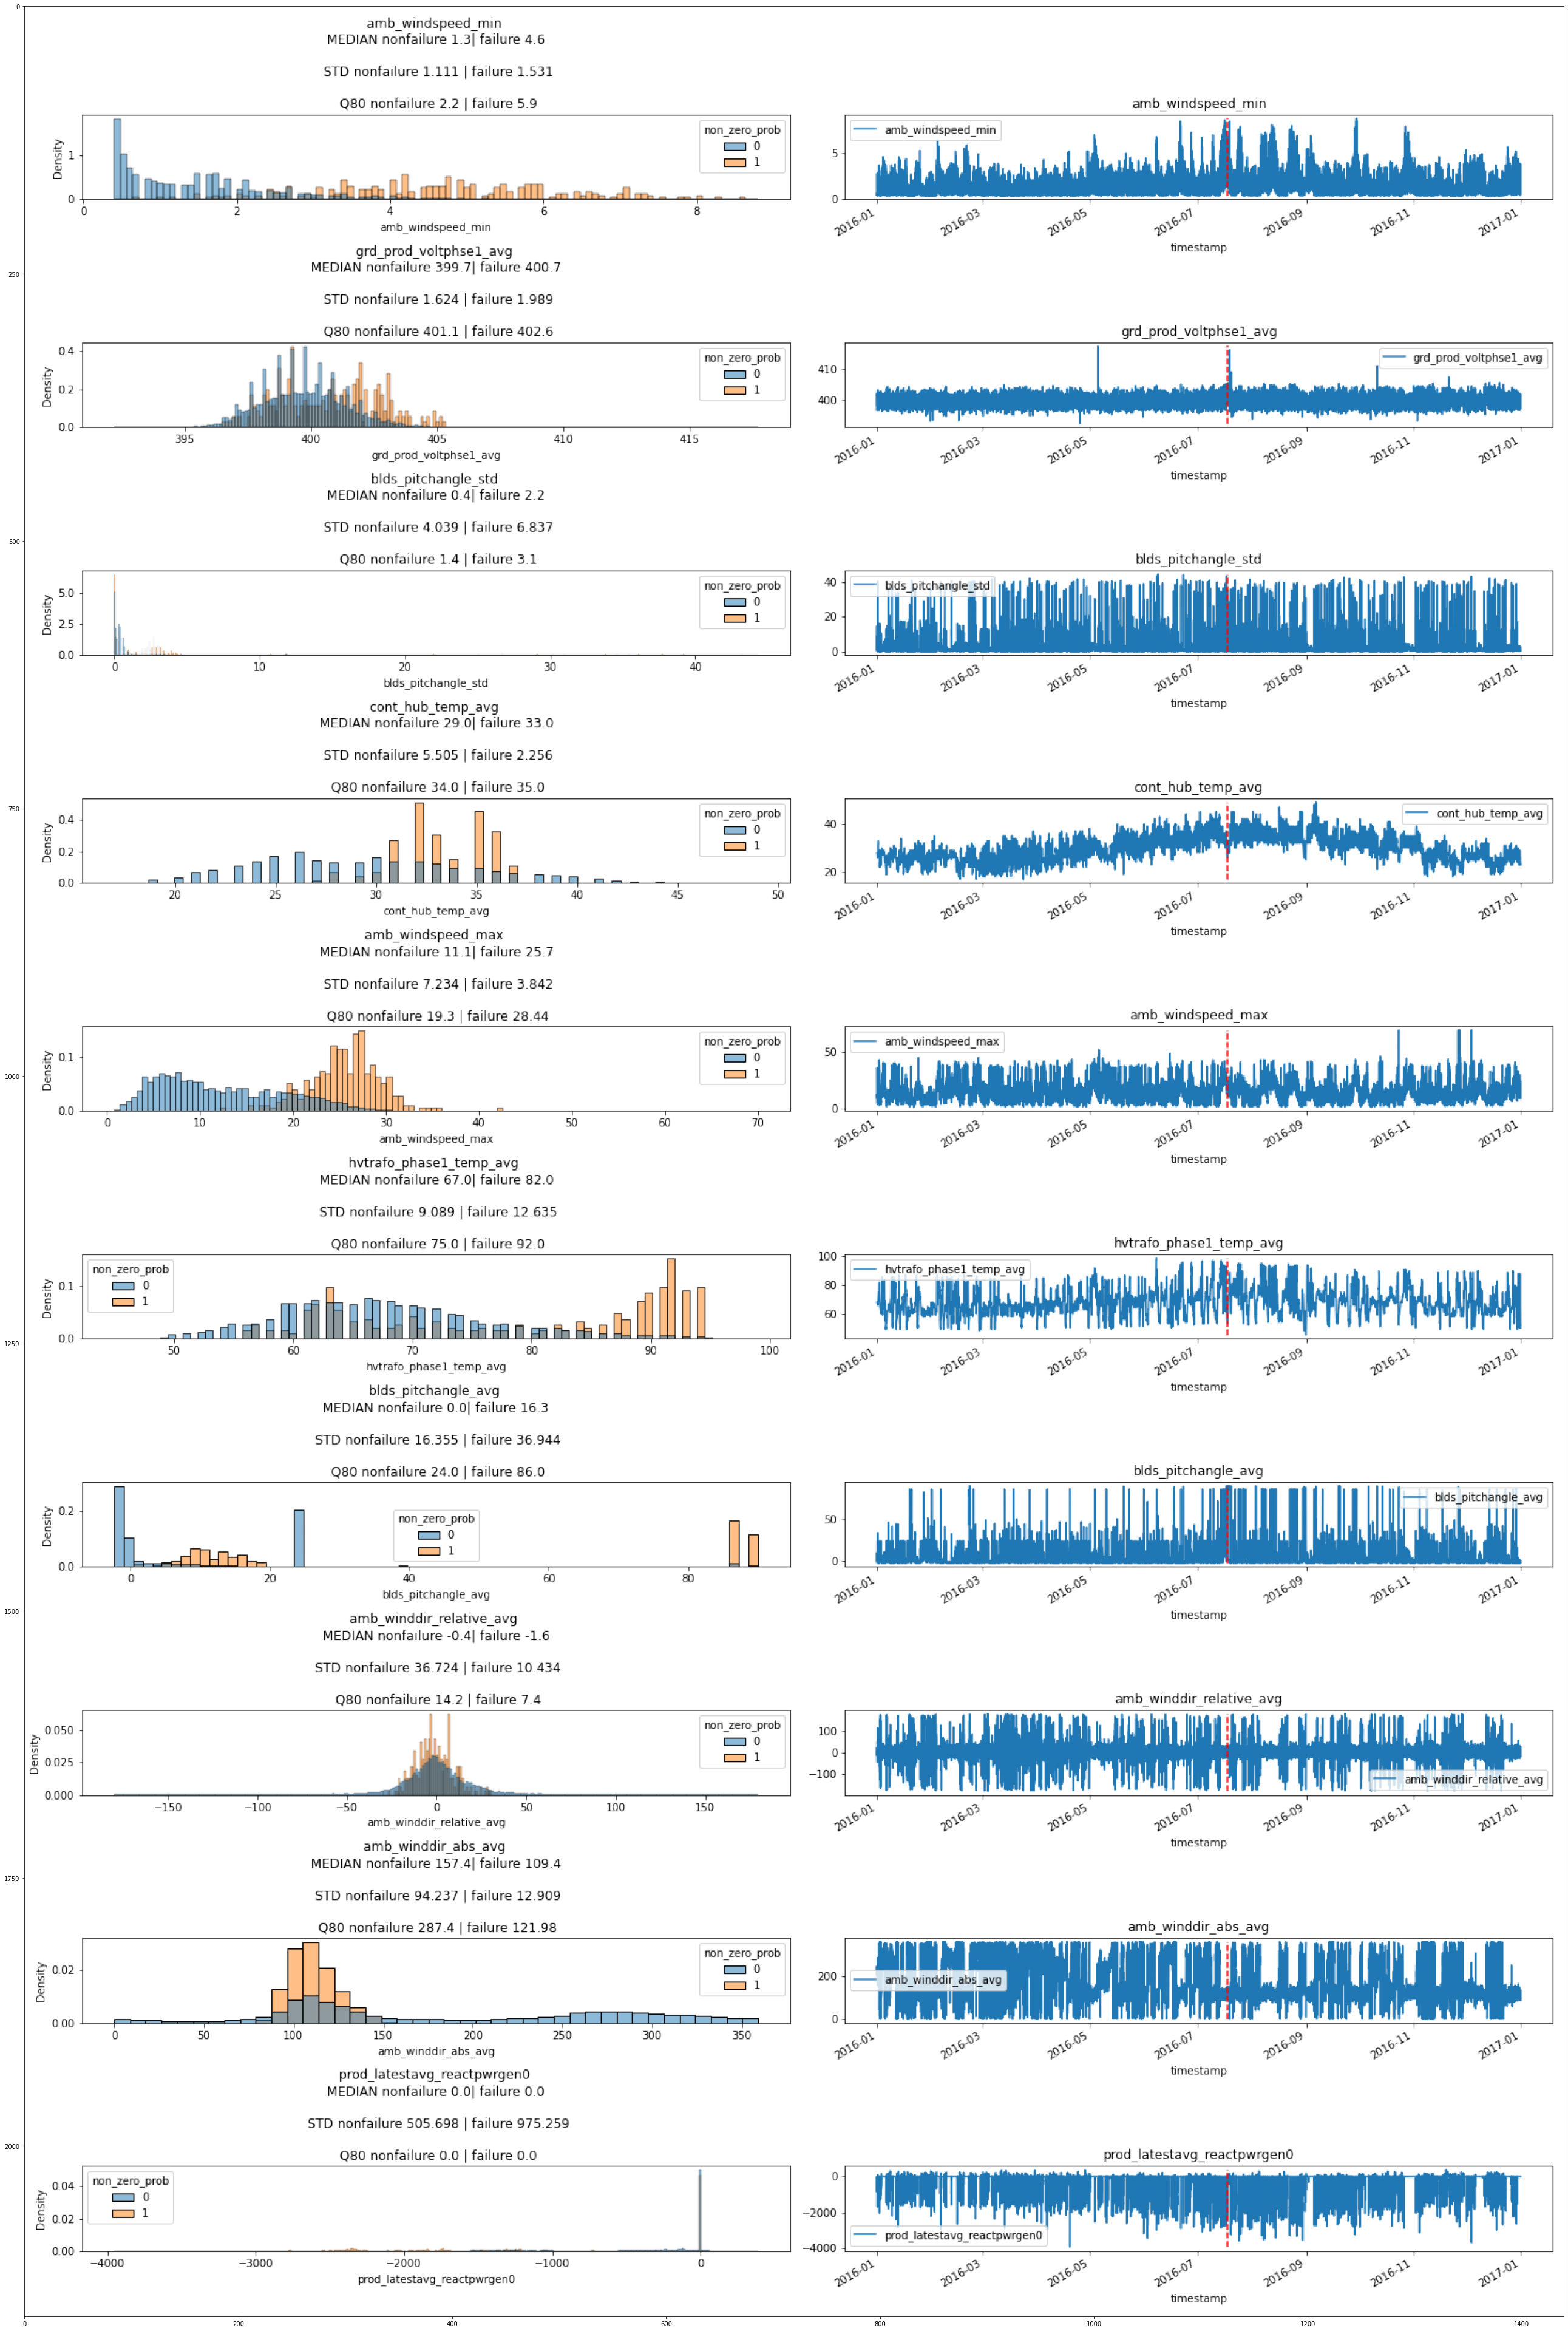

In [41]:

filename = 'histogram_per_variable_failure'
filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

plt.figure(figsize=(70,70))
img = mpimg.imread(filepath)
imgplot = plt.imshow(img)
plt.show()

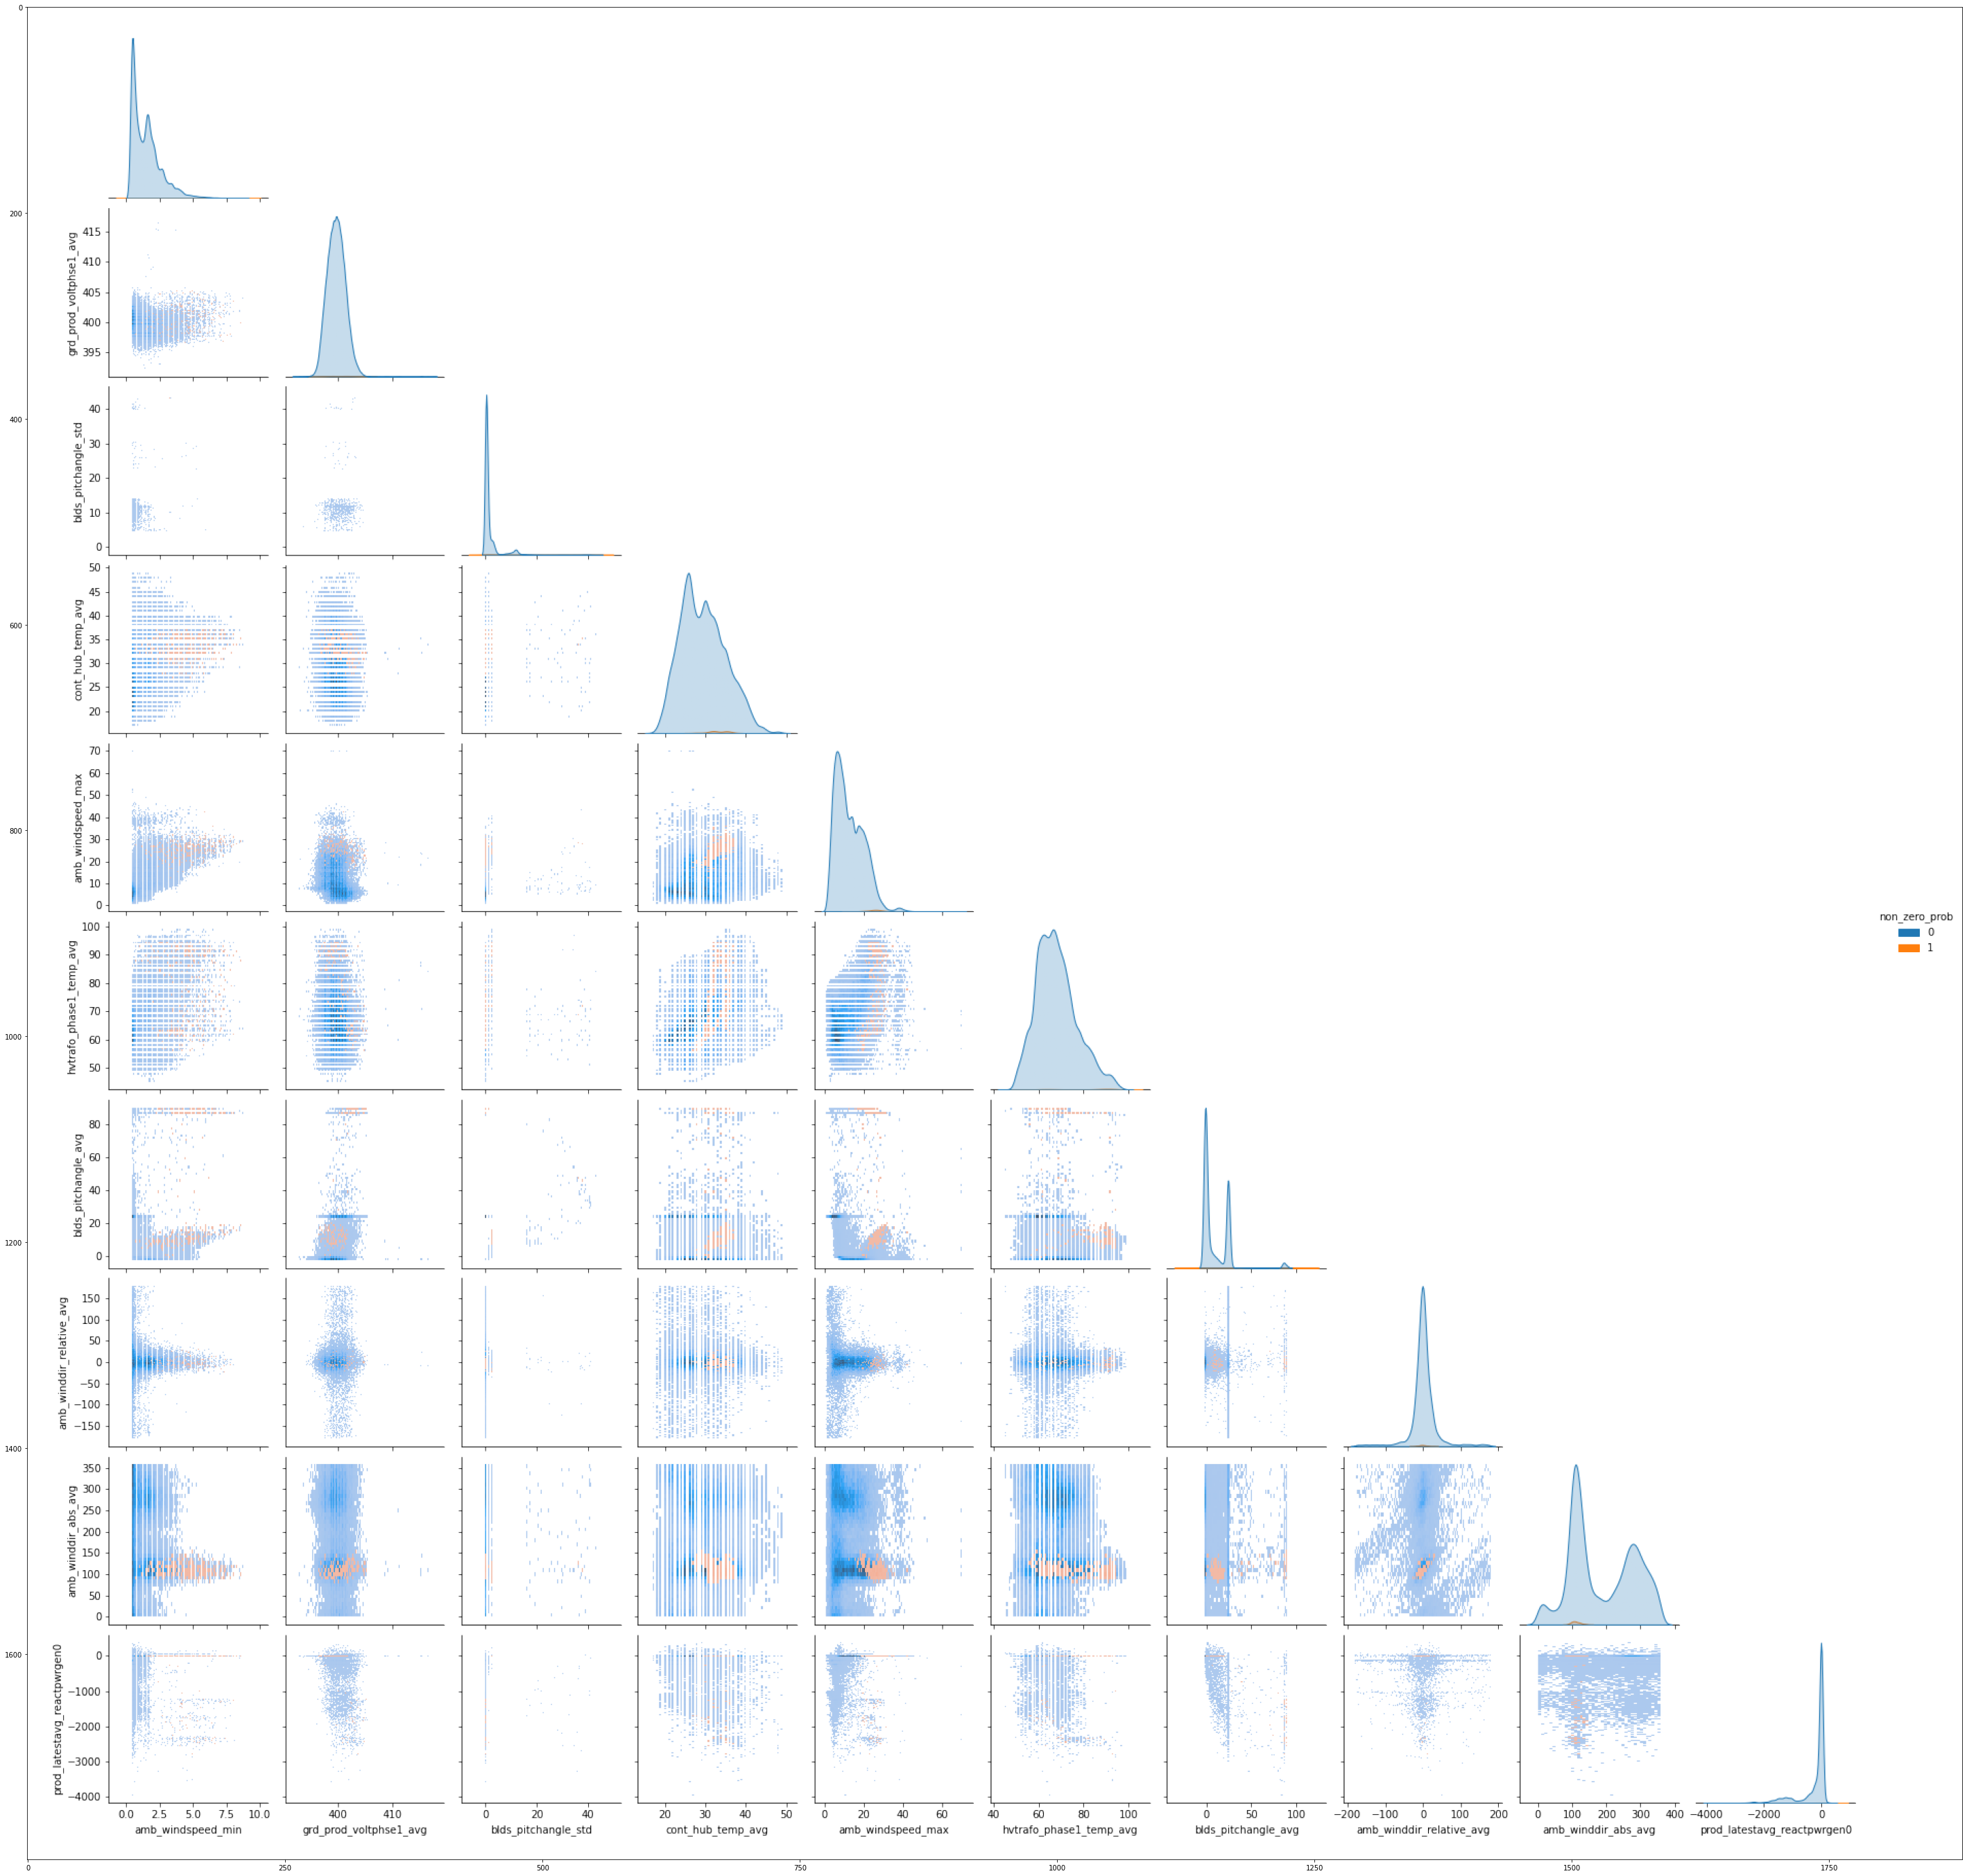

In [42]:

filename = 'float_tags_distribution'
filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

plt.figure(figsize=(50,50))
img = mpimg.imread(filepath)
imgplot = plt.imshow(img)
plt.show()

# Signals of Pre Failure
- low -> amb_windspeed_min 
- high -> blds_pitchangle_avg
- high -> amb_winddir_relative_avg
- high -> grd_prod_psbleind_std
- high -> grd_prod_reactpwr_min

# Validation

In [43]:
test_set = input_prob_failure(df=test_set)
test_set

DONE!


turbine_id  grd_prod_pwr_min  gen_rpm_avg  \
timestamp                                                       
2017-01-01 00:00:00        T01           129.600     1313.700   
2017-01-01 00:10:00        T01            98.000     1271.300   
2017-01-01 00:20:00        T01            60.600     1270.400   
2017-01-01 00:30:00        T01            46.100     1256.100   
2017-01-01 00:40:00        T01            12.600     1252.900   
...                        ...               ...          ...   
2017-08-31 23:20:00        T01           -11.000     1249.400   
2017-08-31 23:30:00        T01            -8.200     1249.200   
2017-08-31 23:40:00        T01           -29.400     1249.200   
2017-08-31 23:50:00        T01             3.700     1249.700   
2017-09-01 00:00:00        T01            61.600     1255.300   

                     blds_pitchangle_max  grd_prod_pwr_avg  \
timestamp                                                    
2017-01-01 00:00:00               -0.200           291.500   
2017-01-01 00:10:00                0.500           207.500   
2017-01-01 00:20:00                0.100           199.700   
2017-01-01 00:30:00                0.500           153.600   
2017-01-01 00:40:00                1.600           101.400   
...                                  ...               ...   
2017-08-31 23:20:00                1.000           110.500   
2017-08-31 23:30:00                2.300            91.800   
2017-08-31 23:40:00                4.400            67.500   
2017-08-31 23:50:00                0.700            88.900   
2017-09-01 00:00:00                0.500           183.900   

                     amb_winddir_abs_avg  gen_bear_temp_avg  \
timestamp                                                     
2017-01-01 00:00:00               94.600             36.000   
2017-01-01 00:10:00               98.400             36.000   
2017-01-01 00:20:00              107.900             36.000   
2017-01-01 00:30:00              114.900             36.000   
2017-01-01 00:40:00              116.300             36.000   
...                                  ...                ...   
2017-08-31 23:20:00              119.900             43.000   
2017-08-31 23:30:00              115.700             43.000   
2017-08-31 23:40:00              109.300             44.000   
2017-08-31 23:50:00              106.700             45.000   
2017-09-01 00:00:00              108.600             45.000   

                     amb_windspeed_min  grd_prod_reactpwr_max  \
timestamp                                                       
2017-01-01 00:00:00              1.500               -121.900   
2017-01-01 00:10:00              1.500               -109.800   
2017-01-01 00:20:00              1.600               -118.800   
2017-01-01 00:30:00              0.400               -124.900   
2017-01-01 00:40:00              0.500                -61.600   
...                                ...                    ...   
2017-08-31 23:20:00              1.600                  0.400   
2017-08-31 23:30:00              1.800                  0.500   
2017-08-31 23:40:00              1.700                325.200   
2017-08-31 23:50:00              1.900                574.400   
2017-09-01 00:00:00              2.700                -83.900   

                     grd_prod_curphse1_avg  ...  grd_prod_cosphi_avg  \
timestamp                                   ...                        
2017-01-01 00:00:00                256.100  ...                0.900   
2017-01-01 00:10:00                193.200  ...                0.900   
2017-01-01 00:20:00                192.500  ...                0.800   
2017-01-01 00:30:00                168.200  ...                0.700   
2017-01-01 00:40:00                131.900  ...                0.600   
...                                    ...  ...                  ...   
2017-08-31 23:20:00                118.900  ...                0.700   
2017-08-31 23:30:00                106.500  ...      

In [44]:
red_tags_float

['amb_windspeed_min',
 'grd_prod_voltphse1_avg',
 'blds_pitchangle_std',
 'cont_hub_temp_avg',
 'amb_windspeed_max',
 'hvtrafo_phase1_temp_avg',
 'blds_pitchangle_avg',
 'amb_winddir_relative_avg',
 'amb_winddir_abs_avg',
 'prod_latestavg_reactpwrgen0']

In [45]:
plot_histogram_per_variable_failure(df=test_set, turbine=turbine, filename='test_histogram_per_variable_failure', tags=red_tags_float)

DONE!


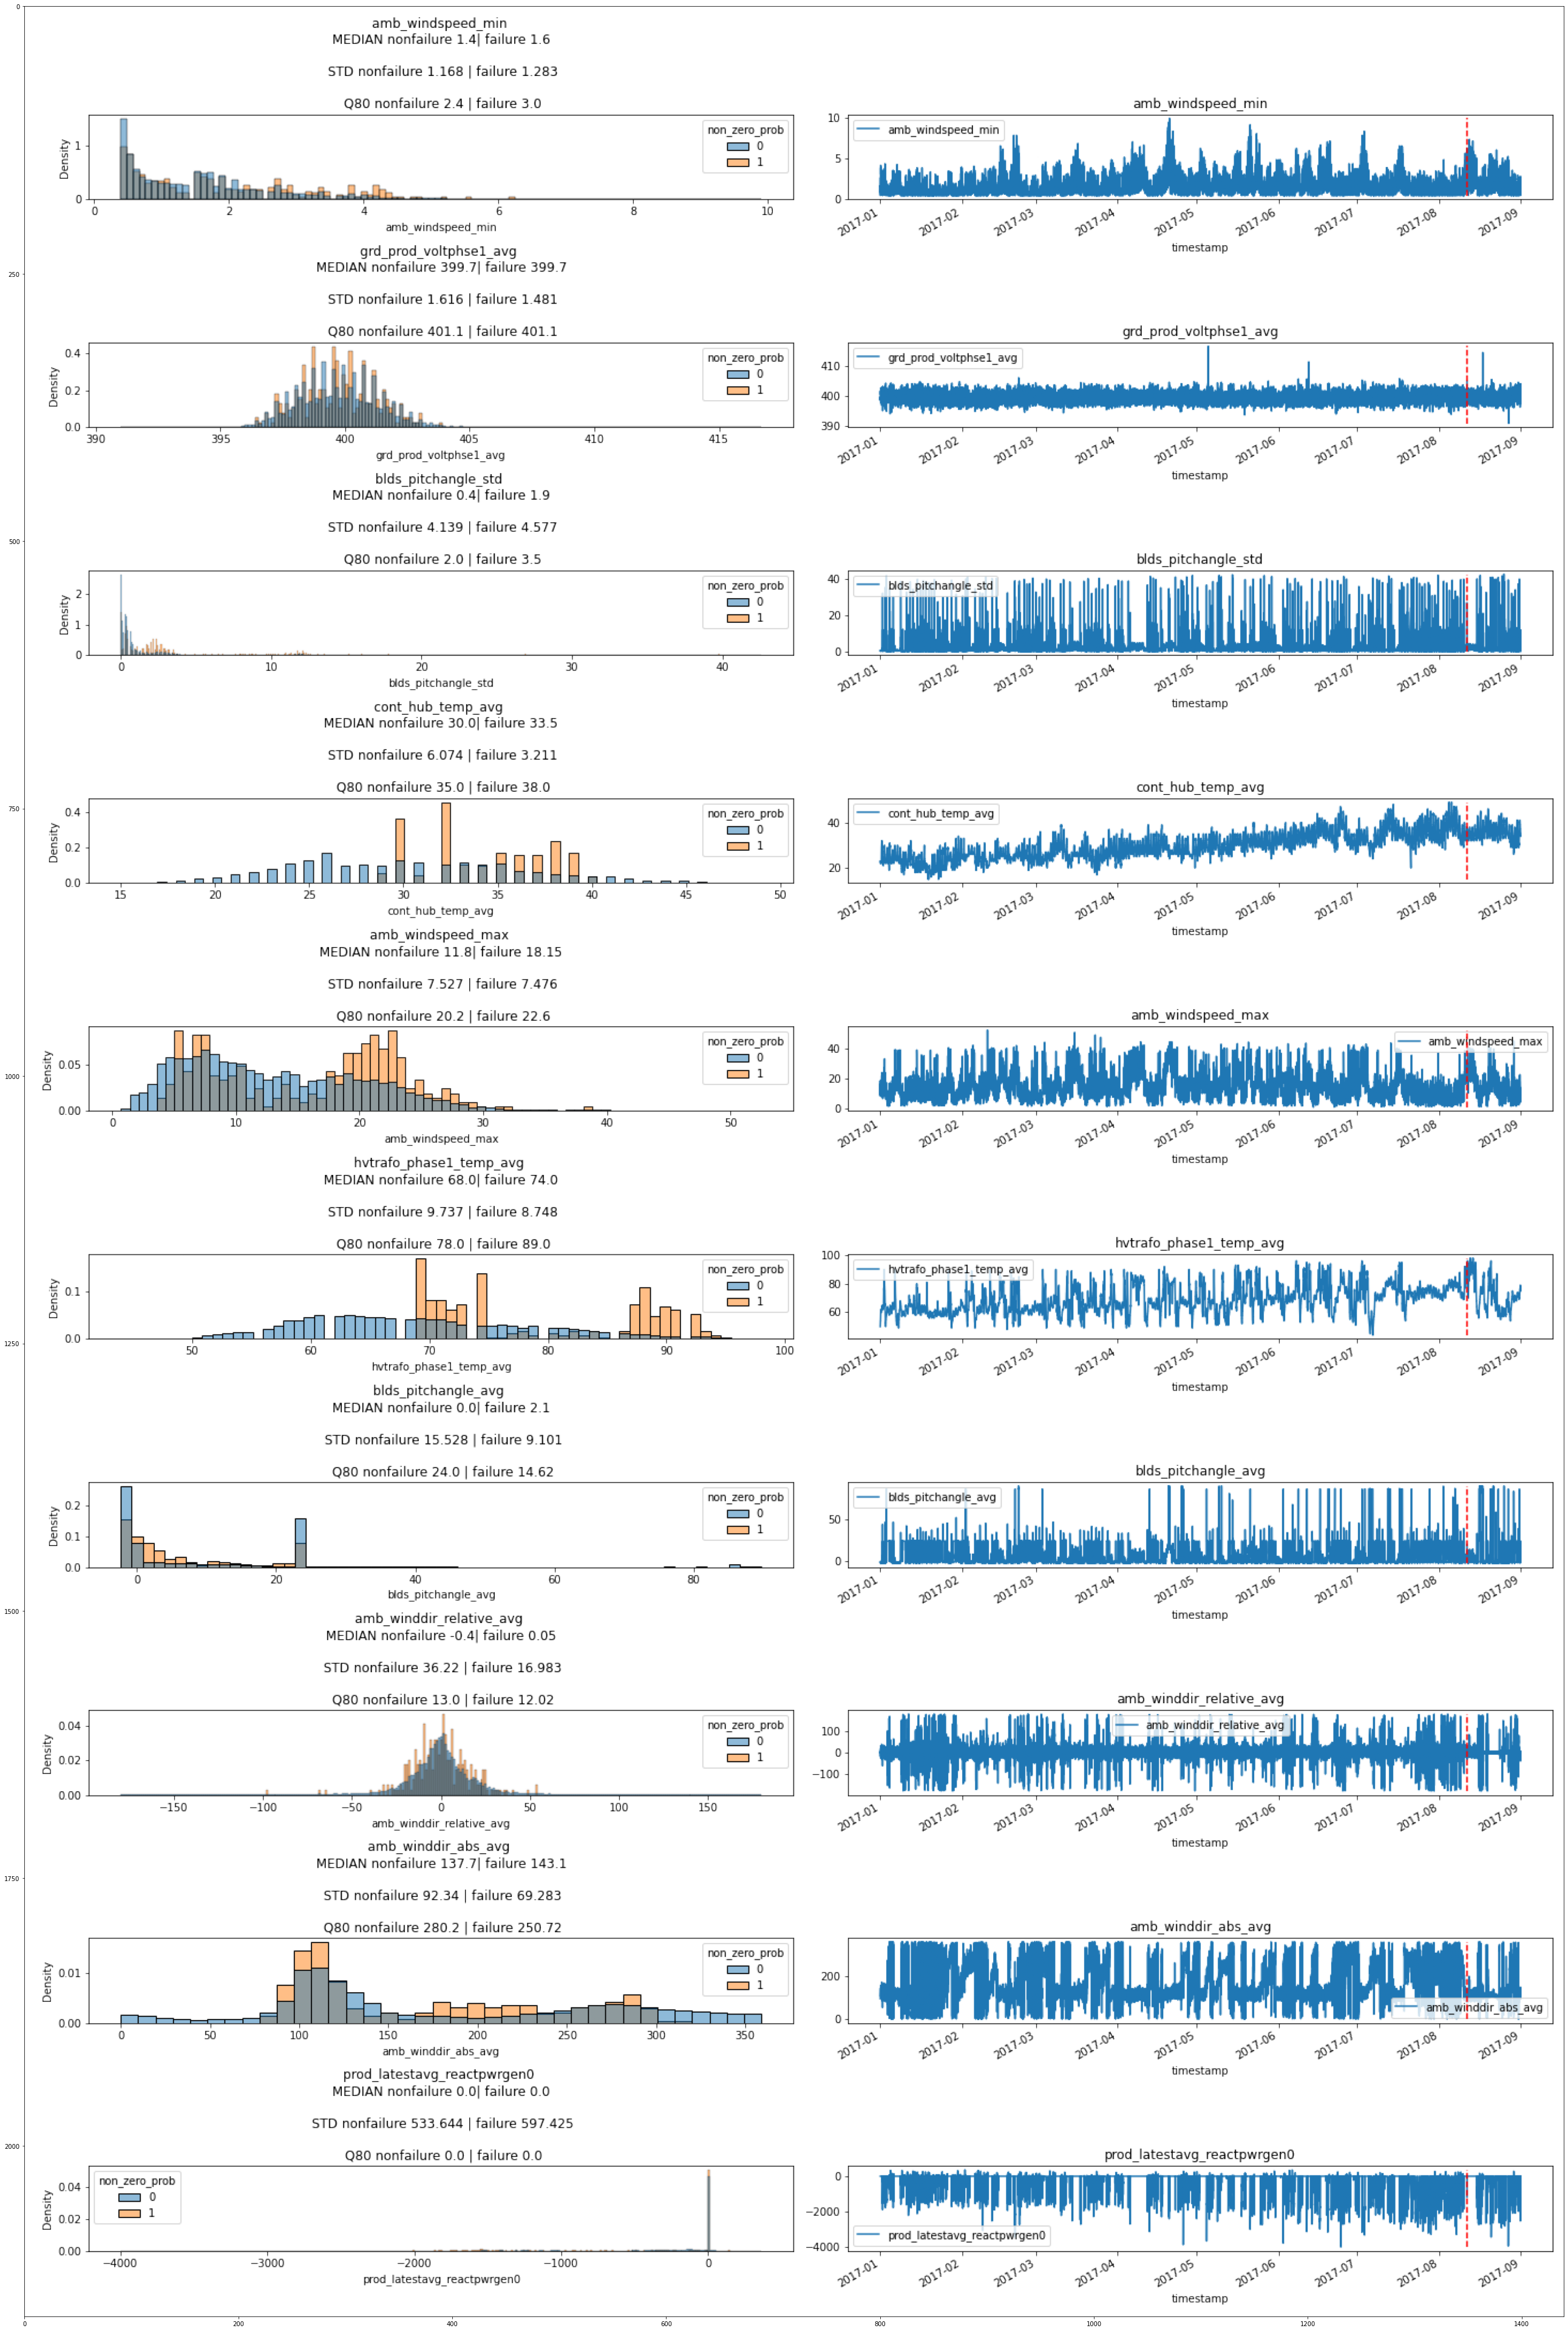

In [46]:

filename = 'test_histogram_per_variable_failure'
filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

plt.figure(figsize=(70,70))
img = mpimg.imread(filepath)
imgplot = plt.imshow(img)
plt.show()

In [47]:
    filename = 'compare_histogram_per_variable_failure'

    tags = red_tags_float.copy()
    plt.figure(figsize=(20,3*len(tags)))
    e = 1 

    # for e,tag in enumerate(red_tags_float):
    for tag in tags:

        df = training_set.copy()
        # DISTRIBUTION FAILURE AND NON FAILURE
        tmp = df[[tag,'non_zero_prob']].copy()
        
        q80_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].quantile(0.8).round(3)
        q80_failure= tmp[tmp['non_zero_prob'] != 0][tag].quantile(0.8).round(3)
        median_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].median().round(3)
        median_failure= tmp[tmp['non_zero_prob'] != 0][tag].median().round(3)
        std_nonfailure= tmp[tmp['non_zero_prob'] == 0][tag].std().round(3)
        std_failure= tmp[tmp['non_zero_prob'] != 0][tag].std().round(3)
        
        txt =f'''\n MEDIAN nonfailure {median_nonfailure}| failure {median_failure} 
            \n STD nonfailure {std_nonfailure} | failure {std_failure}
            \n Q80 nonfailure {q80_nonfailure} | failure {q80_failure}'''
        
        plt.subplot(len(tags),2,e)
        plt.title(f'TRAINING_SET \n {tag} {txt}')
        sns.histplot(data=tmp, x=tag, hue='non_zero_prob', cumulative=False, stat="density", common_norm=False )
        plt.subplots_adjust(wspace=0.15, hspace=0.3)
        plt.tight_layout()
        e += 1
        
        df = test_set.copy()
        # DISTRIBUTION FAILURE AND NON FAILURE
        tmp = df[[tag,'non_zero_prob']].copy()
        
        q80_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].quantile(0.8).round(3)
        q80_failure= tmp[tmp['non_zero_prob'] != 0][tag].quantile(0.8).round(3)
        median_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].median().round(3)
        median_failure= tmp[tmp['non_zero_prob'] != 0][tag].median().round(3)
        std_nonfailure= tmp[tmp['non_zero_prob'] == 0][tag].std().round(3)
        std_failure= tmp[tmp['non_zero_prob'] != 0][tag].std().round(3)
        
        txt =f'''\n MEDIAN nonfailure {median_nonfailure}| failure {median_failure} 
            \n STD nonfailure {std_nonfailure} | failure {std_failure}
            \n Q80 nonfailure {q80_nonfailure} | failure {q80_failure}'''
        
        plt.subplot(len(tags),2,e)
        plt.title(f'TEST_SET \n {tag} {txt}')
        sns.histplot(data=tmp, x=tag, hue='non_zero_prob', cumulative=False, stat="density", common_norm=False )
        plt.subplots_adjust(wspace=0.15, hspace=0.3)
        plt.tight_layout()
        e += 1
                
    # plt.show()
    plt.savefig(f'../output_EDA/{turbine}/figures/{filename}.png')
    plt.close()
    print('DONE!')

DONE!


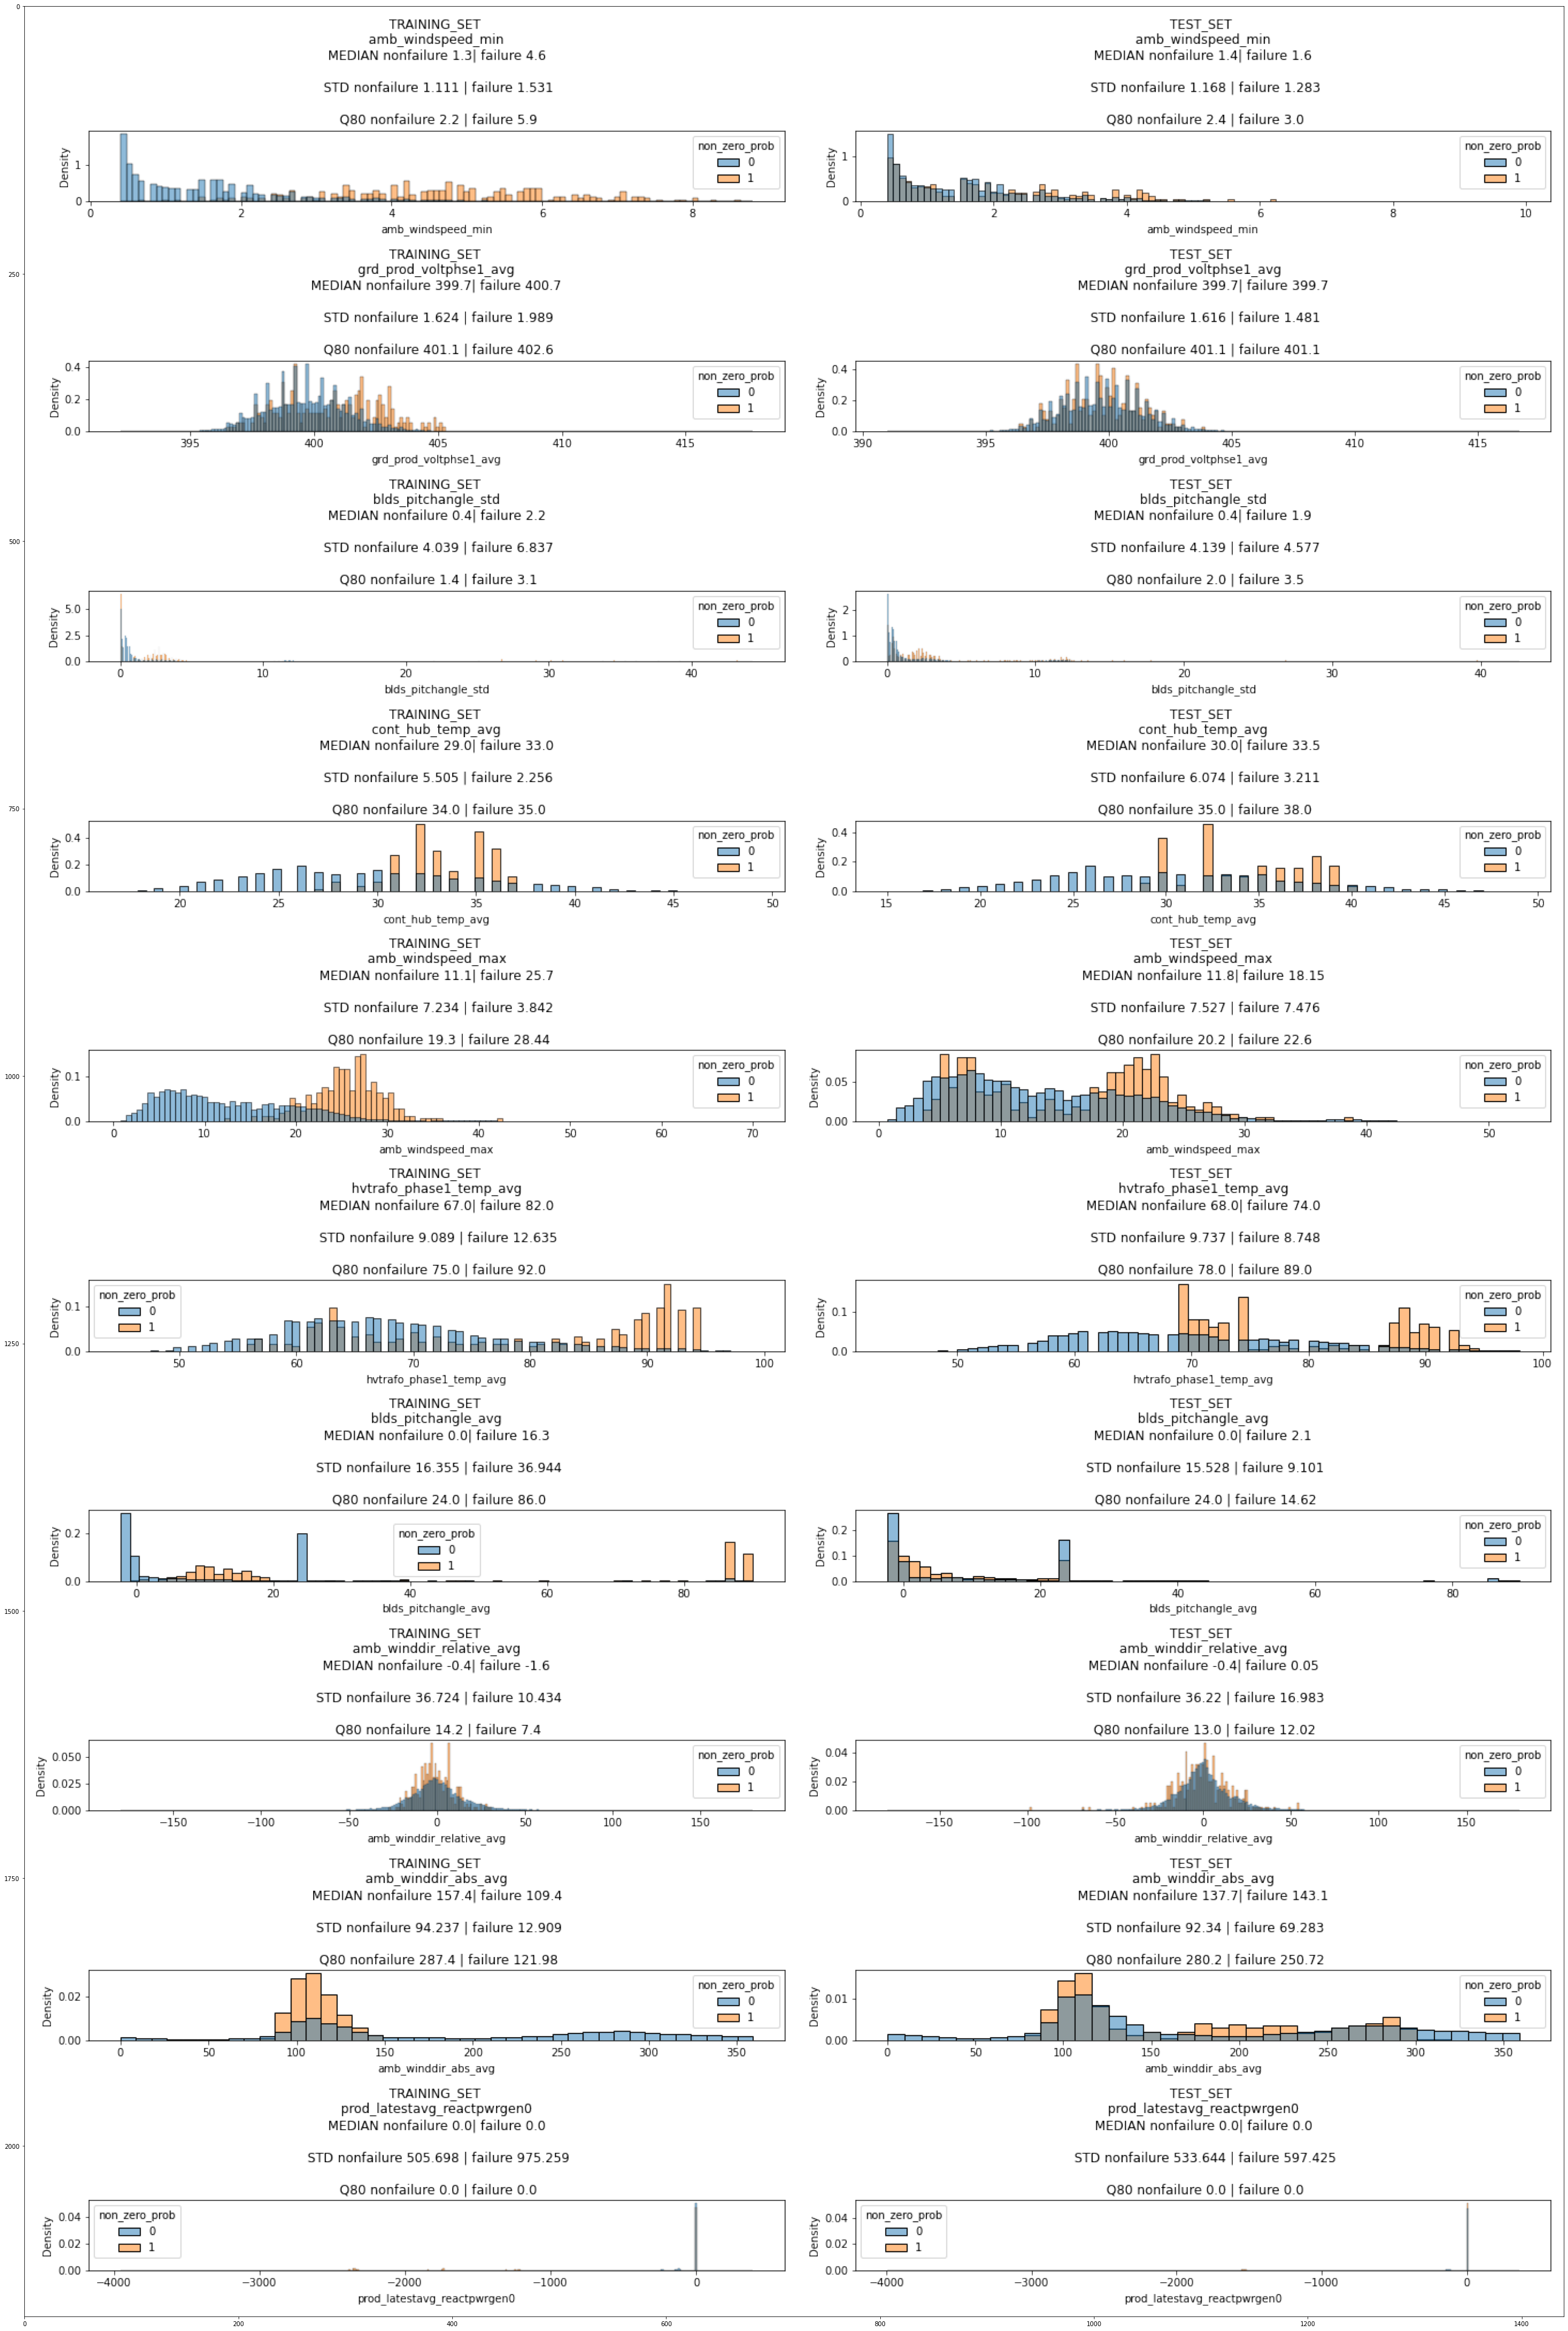

In [48]:

filename = 'compare_histogram_per_variable_failure'
filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

plt.figure(figsize=(70,70))
img = mpimg.imread(filepath)
imgplot = plt.imshow(img)
plt.show()